### Step 1 : Problem
* Currency exchange rate forecasting means predicting future fluctuations in the value of one currency against another.
* It involves the use of historical data, economic indicators, and mathematical models to make accurate predictions about the direction and magnitude of exchange rate movements
* In this project we work on **INR - USD** conversion rate

### Step 2 : Gathering the data
* Importing the necessary libraries and functions
* Importing the relevant data to address the problem

In [15]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # It offers some interactivity on the plots
import plotly.io as pio # provides functions for displaying and saving Plotly figures

In [16]:
# Loading the data into pandas dataframe from CSV file
data = pd.read_csv('INR-USD.csv')

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,45.709000,45.728001,45.449001,45.480000,45.480000,0.0
1,2003-12-08,45.474998,45.507999,45.352001,45.451000,45.451000,0.0
2,2003-12-15,45.450001,45.500000,45.332001,45.455002,45.455002,0.0
3,2003-12-22,45.417000,45.549000,45.296001,45.507999,45.507999,0.0
4,2003-12-29,45.439999,45.645000,45.421001,45.560001,45.560001,0.0


### Step 3 : Explore, Understand, and Preprocess the data

In [17]:
# Checking if there are any missing values in the data
data.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [18]:
# The above output shows that there are some missing values in the data
# Since the total number of missing values is less, we remove the entire rows of missing values
data.dropna(inplace=True)

In [19]:
# Check whether the missing values has been removed or not
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [20]:
# Now lets have a look at the descriptive statistics of the dataset
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.0
mean,58.035208,58.506681,57.654706,58.056509,58.056509,0.0
std,12.614635,12.716632,12.565279,12.657407,12.657407,0.0
min,38.995998,39.334999,38.979000,39.044998,39.044998,0.0
25%,45.508999,45.775002,45.231998,45.498001,45.498001,0.0
50%,59.702999,60.342999,59.209999,59.840000,59.840000,0.0
75%,68.508499,69.099998,68.250000,68.538002,68.538002,0.0
max,82.917999,83.386002,82.563004,82.932999,82.932999,0.0


As we are using the USD – INR conversion rates data, let’s analyze the **conversion rates** between both currencies **over the years**. I’ll start with a line chart showing the **trend of conversion rates over the years:**

In [29]:
figure = px.line(data, x="Date", y="Close", title="INR-USD Conversion Rates over the years")
pio.write_image(figure, 'INR-USD Conversion Rates over the years.png')

![Plot](INR-USD Conversion Rates over the years.png)

In [22]:
# Split the 'Date' into separate 'year' and 'month' columns

# Convert the 'Date' into 'datetime' type with "YYYY-MM-DD" format
data.Date = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# Now create new 'Month' and 'Year' columns
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,2003-12-01,45.709000,45.728001,45.449001,45.480000,45.480000,0.0,2003,12
1,2003-12-08,45.474998,45.507999,45.352001,45.451000,45.451000,0.0,2003,12
2,2003-12-15,45.450001,45.500000,45.332001,45.455002,45.455002,0.0,2003,12
3,2003-12-22,45.417000,45.549000,45.296001,45.507999,45.507999,0.0,2003,12
4,2003-12-29,45.439999,45.645000,45.421001,45.560001,45.560001,0.0,2003,12


Now let's have a look at the **aggregated yearly growth** of the conversion rates between INR and USD

The **growth rate** is calculated as the **percentage change in the closing price over the year**, relative to the **closing price at the beginning of the year**

In [30]:
import plotly.graph_objs as go #provides a low-level interface for creating plots with Plotly

# Calculate yearly growth
growth = data.groupby('Year').agg({'Close' : lambda x : (x.iloc[-1]-x.iloc[0]) / x.iloc[0] * 100})

# Growth Rate = ( (Year's close price - Year's Open Price) / Year's Open Price) * 100
# (x.iloc[-1]-x.iloc[0]) : Change in the closing price over year
# x.iloc[0] : Closing price at the beginning of the year
# Multiplying with 100 is to get the value in percentage

# creating an empty figure object, which later will hold the traces or other layouts we want to add 
fig = go.Figure()

# Adding a bar trace with :
# x-axis -> Year column (Index of growth DF)
# y-axis -> Close column (Aggregated close price)
fig.add_trace(go.Bar(x = growth.index,
                    y = growth['Close'],
                    name='Yearly Growth'))


# Updating the layouts with title, x-axis name, y-axis name ,height and width of the plot
fig.update_layout(title="Yearly Growth of USD - INR Conversion Rate",
                 xaxis_title='Year',
                 yaxis_title="Growth (%)",
                 width=900,
                 height=600)


pio.write_image(figure, 'Yearly Growth of USD - INR Conversion Rate.png')

![Plot](Yearly Growth of USD - INR Conversion Rate.png)

Now let's have a look at the **aggregated monthly growth rate** of the conversion rates between INR - USD 

In [31]:
# Calculate the monthly growth rate for every month of every year
data['Growth'] = data.groupby(['Year', 'Month'])['Close'].transform(lambda x : (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

# Now group the data by 'Month' and calculate average growth rate 
grouped_data = data.groupby('Month').mean().reset_index()

# create an empty Figure instance
fig = go.Figure()

# Add the Bar trace
fig.add_trace(go.Bar(x=grouped_data['Month'],
                    y=grouped_data['Growth'],
                    marker_color=grouped_data['Growth'],
                    hovertemplate='Month : %{x}<br>Average Growth : %{y:.2f}%<extra></extra>')) # format of the hover tooltip

# Update the layouts
fig.update_layout(title = "Aggregated Monthly Growth Conversion Rate of USD - INR",
                 xaxis_title = "Month",
                 yaxis_title = "Average Growth(%)",
                 width=900,
                 height=600)

pio.write_image(figure, 'Aggregated Monthly Growth Conversion Rate of USD - INR.png')

![Plot](Aggregated Monthly Growth Conversion Rate of USD - INR.png)

From the above graph we could see that : 
* Value of USD always falls in January and March
* While in the 2nd quarter, USD becomes very strong against INR every year
* Value of USD peaks in August
* Value falls more in March

### Step 4 : Forecasting Exchange Rates Using Time Series Forecasting
To choose the most appropriate time series forecasting model we need to perform **seasonal decomposition**, which will help us identifying any **recurring patterns, lon-term trends, and random fluctuations** present in USD - INR exchange rates data

C:\Users\prajw\AppData\Local\Temp\ipykernel_13344\2966905141.py:11: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



<Figure size 640x480 with 0 Axes>

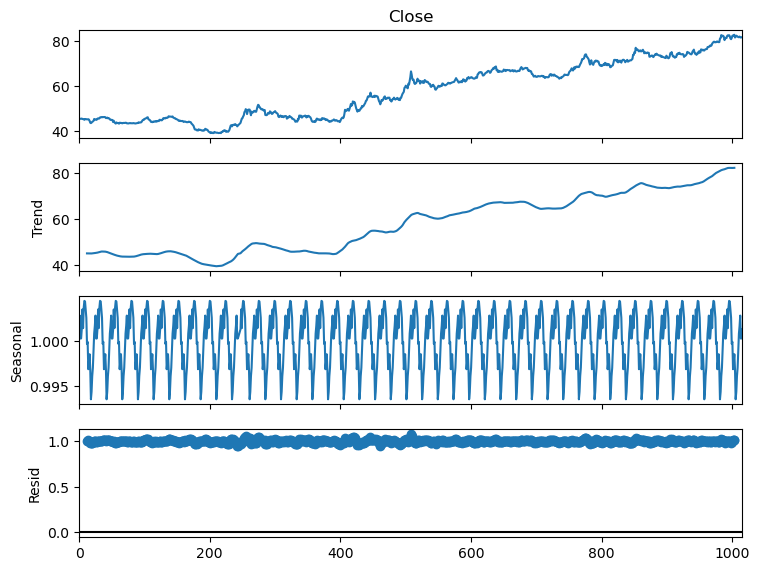

In [25]:
# to decompose a time series into its trend, seasonal, and residual components

from statsmodels.tsa.seasonal import seasonal_decompose

results = seasonal_decompose(data['Close'], model='multiplicative', period=24)

fig = plt.figure()
fig = results.plot()

fig.set_size_inches(8, 6)
fig.show()

* From the above plots we can say that, there is a seasonal pattern in this data.
* So **SARIMA** will be the most appropriate algorithm to this data.
* Before using SARIMA, we need to find the **p, d, and q** values
* For that we use **pmdarima** library

* **SARIMAX** : Seasonal Auto Regressive Integrated Moving Average with eXogenous regressors
* Class used for fitting and forecasting time series data.
* Allow you to model and forecast time series data that exhibit both trend and seasonality, and they can also handle exogenous variables, which are external factors that may influence the time series.


First find the values for p, d, q (Non-seasonal ARIMA parameters)
 * **AutoRegressive Order(p)** : AR component models the relationship between the current observation and a **number of lagged observations** (i.e., the relationship between an observation and a certain number of past observations).
 
 * **Differencing Order(d)** : The differencing component involves differencing the time series data to make it **stationary, removing trends or seasonal patterns. Number of differences needed to make the series stationary**
 
 * **Moving Average Order(q)** : MA component models the relationship between the current observation and a **residual error from a moving average model applied to lagged observations**. Specifies the **size of the moving average window**

And we have a seasonal order (p, d, q, s) :
* s : Seasonal Period
    * **Number of observations per cycle**.
    * If you have monthly data with yearly seasonality, s would be 12.

In [26]:
from pmdarima.arima import auto_arima

pdqModel = auto_arima(data['Close'], seasonal=True, m=52, suppress_warnings = True)

print(pdqModel.order)

p, d, q = pdqModel.order

(2, 1, 0)


In [27]:
# Now lets call the model, train it and run forecasting with it

from statsmodels.tsa.statespace.sarimax import SARIMAX

# seasonal_order = (p, d, q, s)
# s -> Seasonal Period : Number of observations per cycle
model = SARIMAX(data["Close"], order=(p, d, q), 
                seasonal_order=(p, d, q, 52))  

fitted = model.fit() 

print(fitted.summary())

C:\Users\prajw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\prajw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1013
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 52)   Log Likelihood                -905.797
Date:                            Thu, 11 Apr 2024   AIC                           1821.594
Time:                                    20:32:42   BIC                           1845.929
Sample:                                         0   HQIC                          1830.861
                                           - 1013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0313      0.026      1.194      0.233      -0.020       0.083
ar.L2          0.0643      0.026   

#### Let's forecast the future exchange rates

In [28]:
# We are making forecast for 60 more days from the last observation recorded.
predictions = fitted.predict(len(data), len(data)+60)

# len(data) -> Finding the index of the last observation recorded
# len(data)+60 -> Index of last observation + 60 time steps into the future that you want to forecast

print(predictions)

C:\Users\prajw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\prajw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



1013    81.732811
1014    81.886995
1015    82.180324
1016    82.607759
1017    82.474250
          ...    
1069    84.906914
1070    85.402571
1071    85.520269
1072    85.830599
1073    85.687409
Name: predicted_mean, Length: 61, dtype: float64


Let's visualize the forecasted results along with the training data